# Etapas do processo de análise:

#1 - Limpeza de Dados (Data Cleaning)
#2 - Análise e Visualização dos Dados (Data Analysis e Data Visualization)


# 1 - Limpeza de Dados (Data Cleaning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Imports e arquivos
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [ ]:
# Leitura do arquivo
file = pd.read_csv('/content/drive/MyDrive/DESPESAS_CEAPS-2008-2022.csv', sep=';',low_memory=False)

In [ ]:
# Transformando a coluna "VALOR_REEMBOLSADO" de string para float
file['VALOR_REEMBOLSADO'] = file['VALOR_REEMBOLSADO'].astype(str)
file['VALOR_REEMBOLSADO'] = file['VALOR_REEMBOLSADO'].str.replace(',','.')
file['VALOR_REEMBOLSADO'] = file['VALOR_REEMBOLSADO'].str.replace('\r\n','')
file['VALOR_REEMBOLSADO'] = file['VALOR_REEMBOLSADO'].astype(float)

# Tratando o banco de dados para análise
df = file.drop(['CNPJ_CPF','FORNECEDOR','DOCUMENTO','DATA','DETALHAMENTO','COD_DOCUMENTO'],axis=1)

# Visualização do DataFrame limpo e verificação de suas informações
display(df)
df.info()

,ANO,MES,SENADOR,TIPO_DESPESA,VALOR_REEMBOLSADO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",6000.00
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,1500.00
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,6000.00
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,1000.00
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,2000.00
...,...,...,...,...,...
317958,2008,11,WELLINGTON SALGADO DE OLIVEIRA,"Locomoção, hospedagem, alimentação, combustíve...",6152.97
317959,2008,12,WELLINGTON SALGADO DE OLIVEIRA,"Aluguel de imóveis para escritório político, c...",3818.87
317960,2008,12,WELLINGTON SALGADO DE OLIVEIRA,Aquisição de material de consumo para uso no e...,886.66
317961,2008,12,WELLINGTON SALGADO DE OLIVEIRA,"Contratação de consultorias, assessorias, pesq...",7070.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317963 entries, 0 to 317962
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                317963 non-null  int64  
 1   MES                317963 non-null  int64  
 2   SENADOR            317963 non-null  object 
 3   TIPO_DESPESA       317963 non-null  object 
 4   VALOR_REEMBOLSADO  317963 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 12.1+ MB


# 2 - Análise e Visualização dos Dados (Data Analysis e Data Visualization)

In [ ]:
# Função para remover itens repetidos das listas criadas a partir das colunas do DataFrame, sem perder a ordem original
def RemoveRepetidos(lista):
    visto = set()
    adicionar_visto = visto.add
    return [x for x in lista if not (x in visto or adicionar_visto(x))]

# Listas necessárias para o código
lista_ano = df['ANO'].tolist()
lista_mes = df['MES'].tolist()
lista_senadores = df['SENADOR'].tolist()
lista_tipo_despesa = df['TIPO_DESPESA'].tolist()
lista_cores = ["#20257c", "#424ad1", "#6a8ee8", "#66bbe2", "#66dee2", "#6ad187", "#5d996c"]
despesas = ['Aluguel de imóveis para escritório público','Divulgação de atividade parlamentar',
            'Passagens aéreas, aquáticas e terrestres nacionais','Contratações (consultorias, assessorias...)',
            'Locomoção, hospedagem, alimentação...','Materiais para uso no escritório público','Serviços de segurança privada',''] # Lista de despesas para legenda de gráfico
despesas_colunas = ['Aluguel de imóveis para escritório público','Divulgação de atividade parlamentar',
                    'Passagens aéreas, aquáticas e terrestres nacionais','Contratações (consultorias, assessorias...)',
                    'Locomoção, hospedagem, alimentação','Materiais para uso no escritório público','Serviços de segurança privada'] # Lista de despesas para DataFrame

In [ ]:
# Verificando o número de senadores por ano
numero_senadores = []
for ano in RemoveRepetidos(lista_ano):
  dfteste = df[df['ANO']==ano]
  teste = dfteste['SENADOR'].tolist()
  numero_senadores.append(len(RemoveRepetidos(teste)))
for i,j in zip(numero_senadores,RemoveRepetidos(lista_ano)):
  print(i,j)

97 2022
86 2021
84 2020
127 2019
91 2018
88 2017
93 2016
101 2015
88 2014
84 2013
90 2012
117 2011
89 2010
85 2009
85 2008


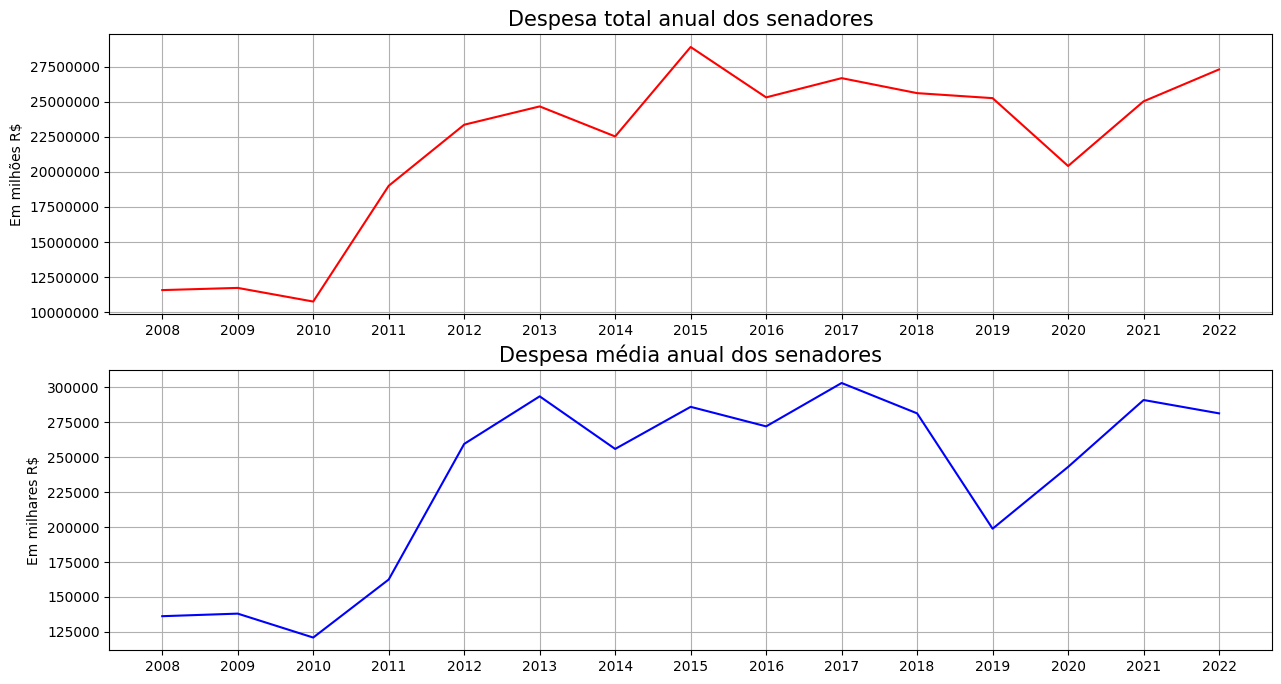

In [ ]:
lista_gasto_medio_ano = []
lista_gasto_ano = []

# Descobrindo os gastos e suas médias por ano e adicionando à lista
for ano in RemoveRepetidos(lista_ano):
    df_ano = df[df['ANO']==ano]
    gasto_ano = df_ano['VALOR_REEMBOLSADO'].sum()
    lista_gasto_ano.append(gasto_ano)
    gasto_medio_ano = gasto_ano/len(RemoveRepetidos(df_ano['SENADOR'].tolist())) # Divide pelo número de senadores no ano
    lista_gasto_medio_ano.append(gasto_medio_ano)

# Gráfico de gastos totais por ano
fig = plt.figure(figsize=(15,8))
eixo1 = fig.add_subplot(2,1,1)
eixo1.plot(RemoveRepetidos(lista_ano),lista_gasto_ano, color="red")
eixo1.xaxis.set_major_locator(MultipleLocator(1))
eixo1.xaxis.set_major_formatter('{x:.0f}')
eixo1.set_ylabel("Em milhões R$")
eixo1.set_title("Despesa total anual dos senadores", fontsize=15)
plt.grid()
plt.ticklabel_format(style='plain',axis='y')

# Gráfico de gastos médios por ano
eixo2 = fig.add_subplot(2,1,2)
eixo2.plot(RemoveRepetidos(lista_ano),lista_gasto_medio_ano, color="blue")
eixo2.xaxis.set_major_locator(MultipleLocator(1))
eixo2.xaxis.set_major_formatter('{x:.0f}')
eixo2.set_ylabel("Em milhares R$")
eixo2.set_title("Despesa média anual dos senadores", fontsize=15)
plt.grid()
plt.show()

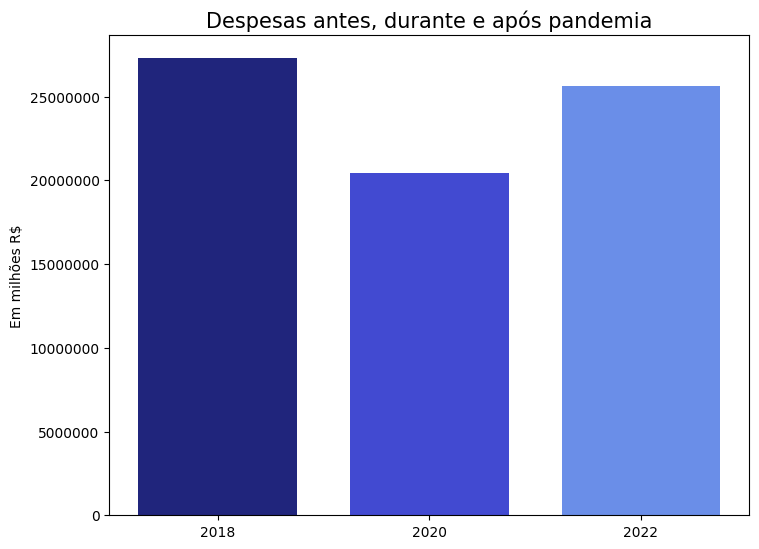

In [33]:
# Gráfico para análise de antes, durante e pós pandemia
fig = plt.figure()
eixo = fig.add_axes([0, 0, 1, 1])
eixo.bar([2018,2020,2022],lista_gasto_ano[:5:2],color=lista_cores,width=1.5)
eixo.set_title(("Despesas antes, durante e após pandemia"), fontsize=15)
eixo.xaxis.set_major_locator(MultipleLocator(2))
plt.ticklabel_format(style='plain',axis='y')
eixo.set_ylabel("Em milhões R$")
plt.show()

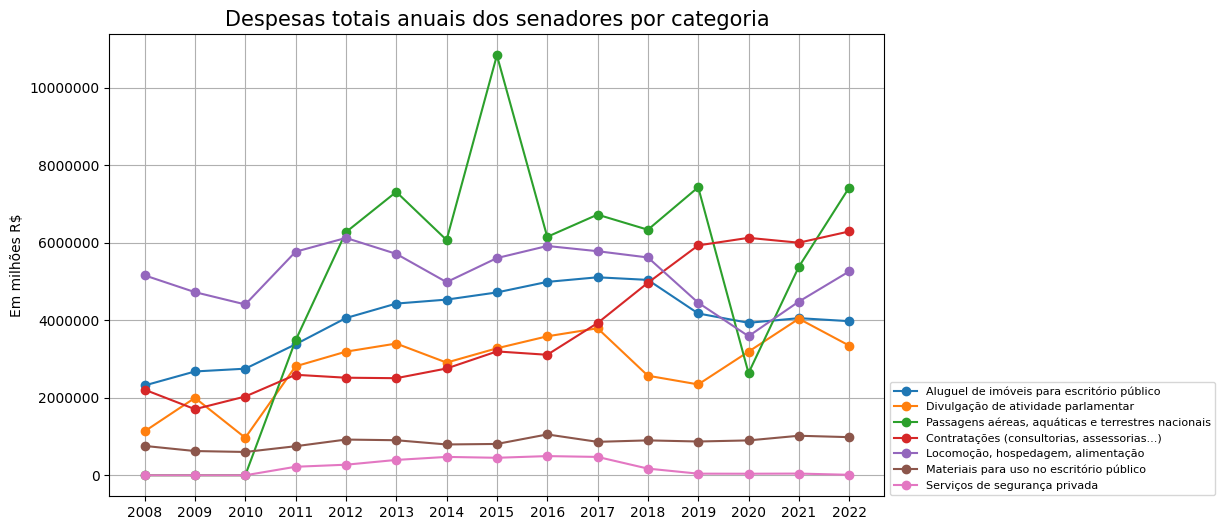

In [45]:
# Criação dos DataFrames com os anos como linhas
df_despesas_ano = pd.DataFrame(index=RemoveRepetidos(lista_ano))
df_media_despesas_ano = pd.DataFrame(index=RemoveRepetidos(lista_ano))

# Completando os DataFrames
for tipo_despesa in RemoveRepetidos(lista_tipo_despesa):
  df_despesa = df[df['TIPO_DESPESA']==tipo_despesa]
  lista_gasto_despesa = []
  lista_media_tipo_despesa = []
  for ano in RemoveRepetidos(lista_ano):
    df_despesa_ano = df_despesa[df_despesa['ANO']==ano]
    gasto_despesa = (df_despesa_ano['VALOR_REEMBOLSADO'].sum())
    lista_gasto_despesa.append(gasto_despesa)
    if len(df_despesa_ano) != 0:
      gasto_medio_despesa_ano = (df_despesa_ano['VALOR_REEMBOLSADO'].sum())/(len(RemoveRepetidos(df_despesa_ano['SENADOR'].tolist()))) # Divide pelo número de senadores daquele ano
    else:
      gasto_medio_despesa_ano = 0
    lista_media_tipo_despesa.append(gasto_medio_despesa_ano)
  df_despesas_ano[tipo_despesa] = lista_gasto_despesa
  df_media_despesas_ano[tipo_despesa] = lista_media_tipo_despesa

# Mudança no nome das colunas para melhor apresentação da legenda
df_despesas_ano.columns = despesas_colunas
df_media_despesas_ano.columns = despesas_colunas

# Gráfico de gastos por ano e para cada tipo de despesa
eixo = df_despesas_ano.plot(figsize=(10,6),marker='o')
eixo.xaxis.set_major_locator(MultipleLocator(1))
eixo.set_ylabel("Em milhões R$")
plt.legend(bbox_to_anchor=(1,0.125),
           loc='center left',
           fontsize=8)
plt.ticklabel_format(style='plain',axis='y')
plt.title("Despesas totais anuais dos senadores por categoria",fontsize=15)
plt.grid()
plt.show()

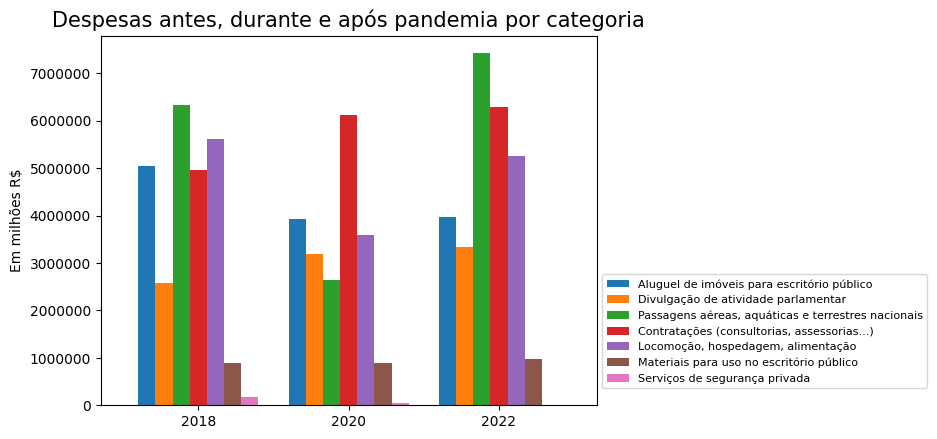

In [46]:
# Gráfico para análise de antes, durante e pós pandemia
eixo = df_despesas_ano[4::-2].plot(kind='bar',width=0.8)
eixo.set_ylabel("Em milhões R$")
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,0.2),
           loc='center left',
           fontsize=8,)
plt.title("Despesas antes, durante e após pandemia por categoria",fontsize=15)
plt.show()

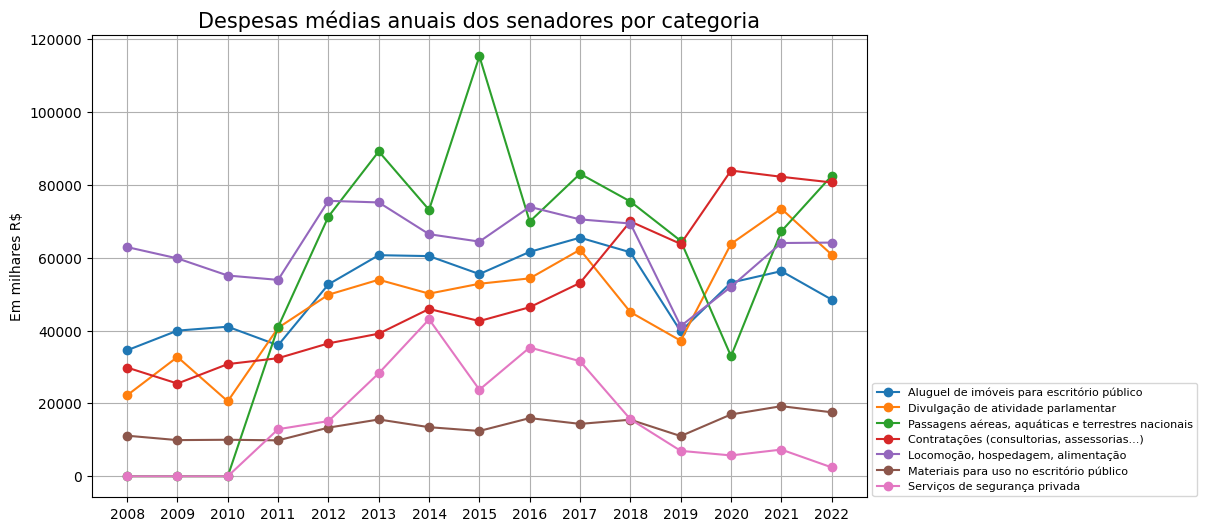

In [47]:
# Gráfico da média de gastos por ano e para cada tipo de despesa
eixo = df_media_despesas_ano.plot(figsize=(10,6),marker='o')
eixo.xaxis.set_major_locator(MultipleLocator(1))
eixo.set_ylabel("Em milhares R$")
plt.legend(bbox_to_anchor=(1,0.125),
           loc='center left',
           fontsize=8)
plt.ticklabel_format(style='plain',axis='y')
plt.title("Despesas médias anuais dos senadores por categoria",fontsize=15)
plt.grid()
plt.show()

<ipython-input-48-b39efaab9404>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  eixo.set_yticklabels(despesas)


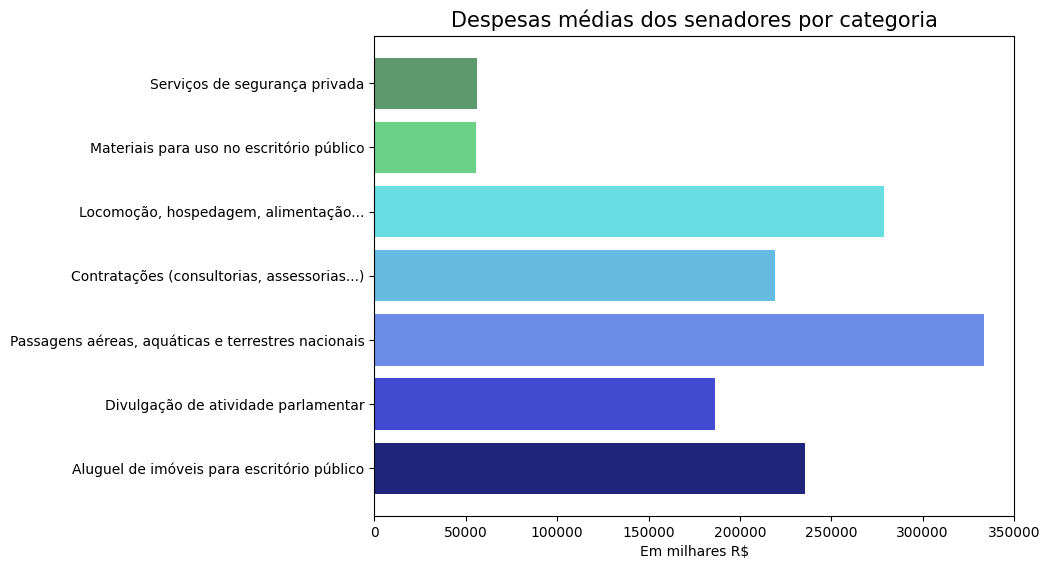

In [48]:
lista_gasto_medio_despesa = []

# Descobrindo os gastos médios por tipo de despesa
for tipo_despesa in RemoveRepetidos(lista_tipo_despesa):
    df_despesa = df[df['TIPO_DESPESA']==tipo_despesa]
    gasto_medio_despesa = df_despesa['VALOR_REEMBOLSADO'].sum()/len(RemoveRepetidos(df_despesa['SENADOR'].tolist())) # Divide pelo número de senadores presentes naquela categoria
    lista_gasto_medio_despesa.append(gasto_medio_despesa)

# Gráfico de gastos médios por tipo de despesa
fig = plt.figure()
eixo = fig.add_axes([0, 0, 1, 1])
eixo.barh(RemoveRepetidos(lista_tipo_despesa),lista_gasto_medio_despesa,color=lista_cores)
eixo.set_title(("Despesas médias dos senadores por categoria"), fontsize=15)
eixo.set_yticklabels(despesas)
eixo.set_xlabel("Em milhares R$")
plt.show()

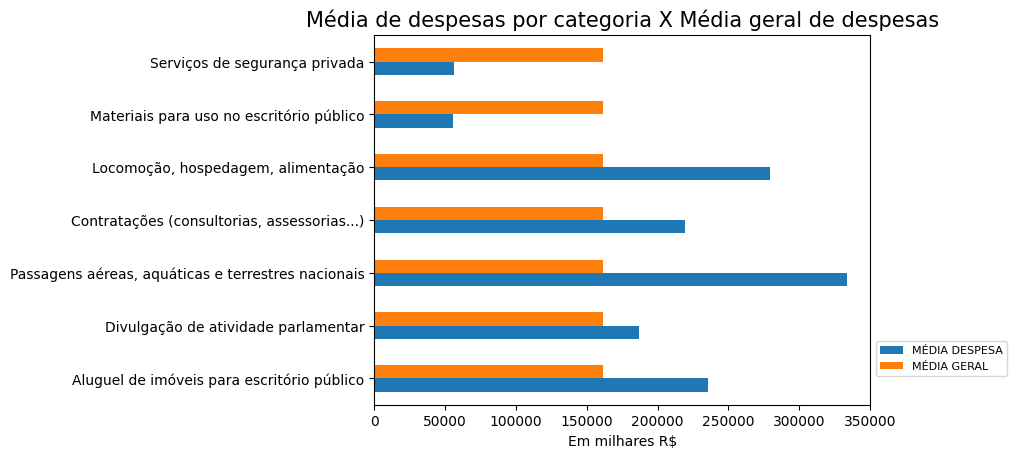

In [49]:
# Média total de gastos dos senadores por tipo de despesa
soma = df['VALOR_REEMBOLSADO'].sum()
media_despesas = soma/len(RemoveRepetidos(lista_senadores))/len(RemoveRepetidos(lista_tipo_despesa))
media_nacional = []

while len(media_nacional) < len(despesas_colunas):
  media_nacional.append(media_despesas)

# Gráfico comparativo entre as médias de gastos para cada despesa e a média de gasto geral
df_despesas_maiores = pd.DataFrame(index=despesas_colunas)
df_despesas_maiores['MÉDIA DESPESA'] = lista_gasto_medio_despesa
df_despesas_maiores['MÉDIA GERAL'] = media_nacional

eixo = df_despesas_maiores.plot(kind='barh')
eixo.set_xlabel("Em milhares R$")
plt.legend(bbox_to_anchor=(1,0.125),
           loc='center left',
           fontsize=8,)
plt.title("Média de despesas por categoria X Média geral de despesas",fontsize=15)
plt.show()

In [ ]:
lista_gastos_senador = []

# Adicionando à lista os gastos totais de cada senador
for senador in RemoveRepetidos(lista_senadores):
    df_senadores = df[df['SENADOR']==senador]
    gastos_senador = df_senadores['VALOR_REEMBOLSADO'].sum()
    lista_gastos_senador.append(gastos_senador)

# Criando um DataFrame com as colunas dos senadores e seus gastos
df_new = pd.DataFrame(RemoveRepetidos(lista_senadores))
df_new.columns = ['SENADOR']
df_new['DESPESA TOTAL'] = lista_gastos_senador

# Separando os senadores com maiores gastos, independente de ano, em um novo DataFrame
df10 = df_new.nlargest(10,'DESPESA TOTAL')

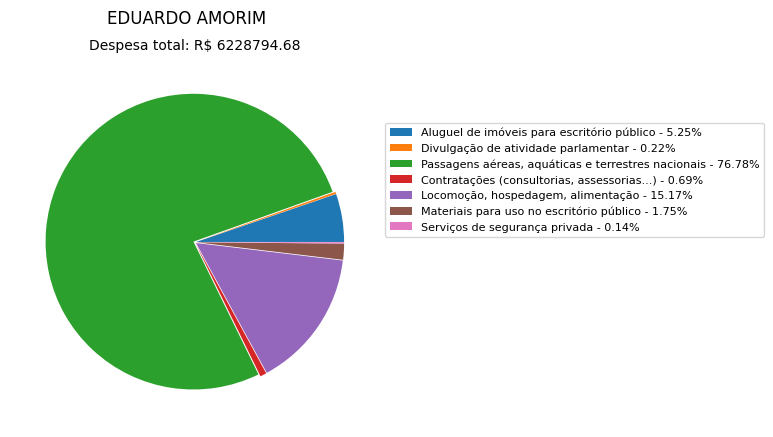

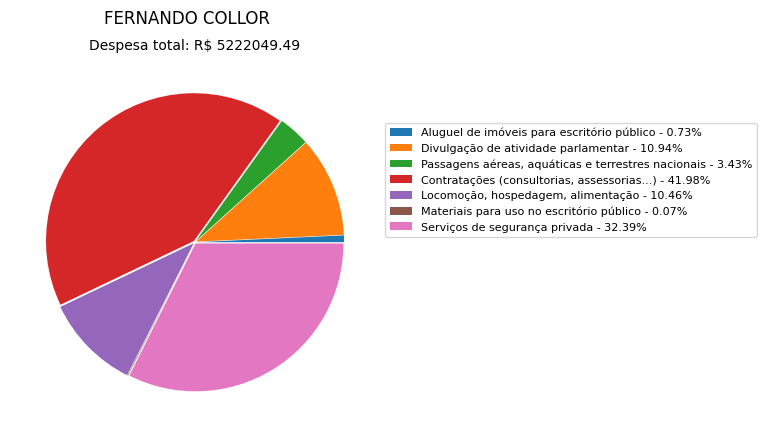

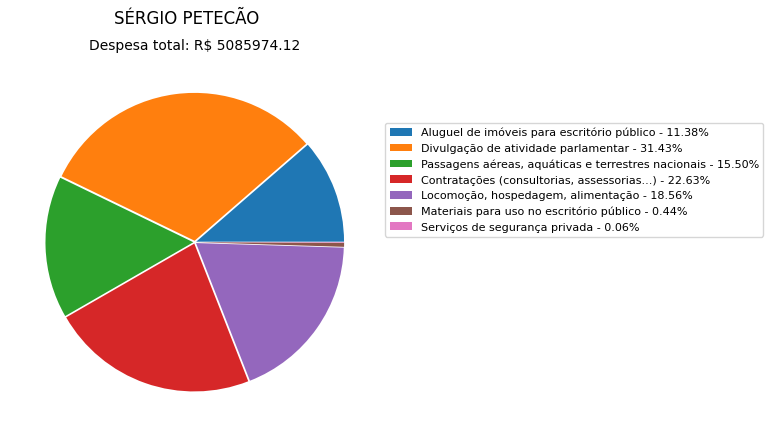

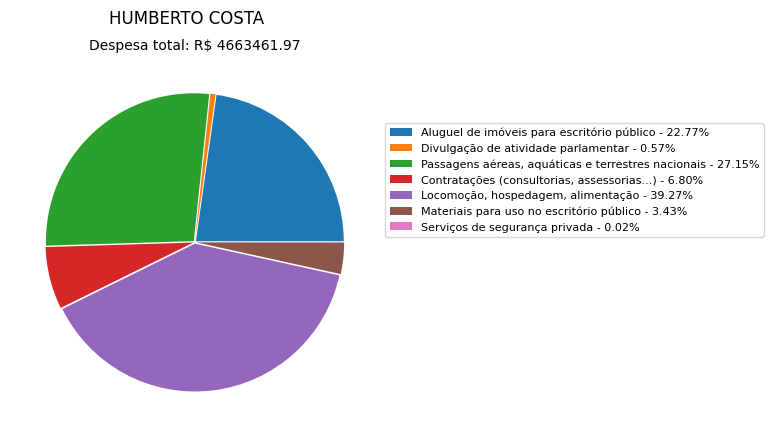

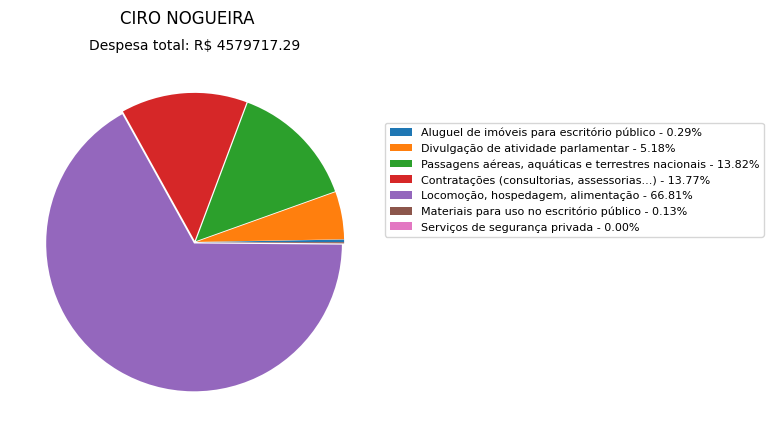

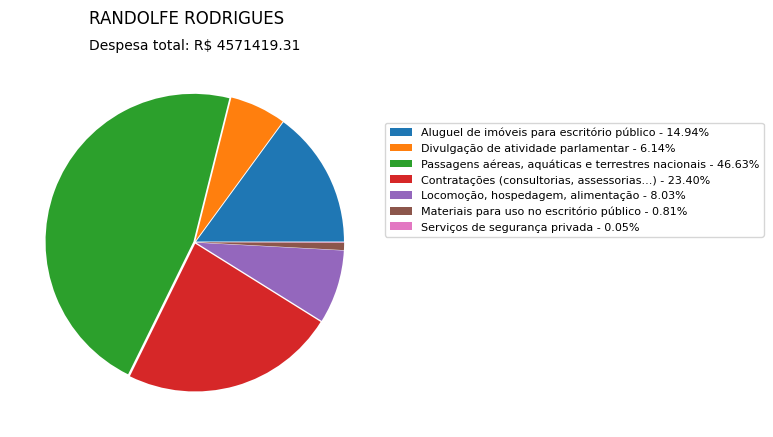

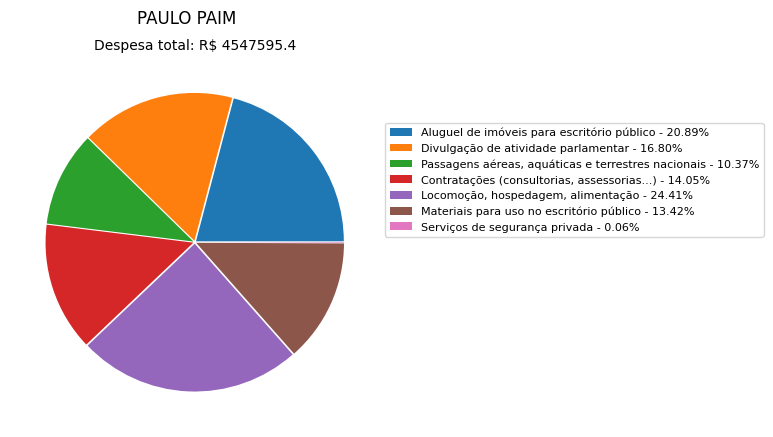

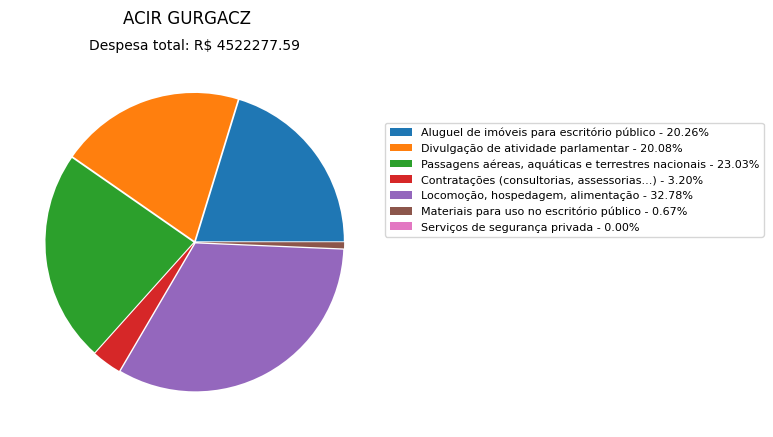

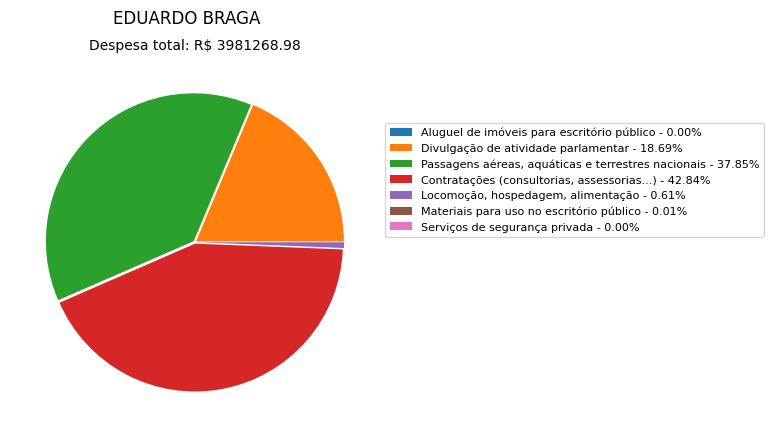

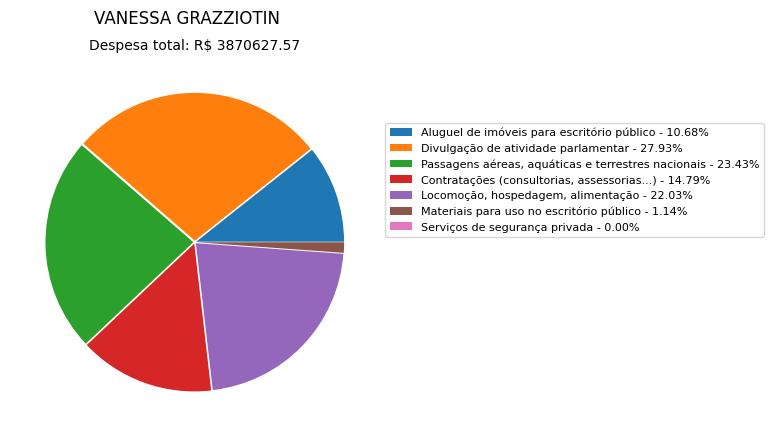

In [ ]:
destaque = [0.01,0.01,0.01,0.01,0.01,0.01,0.01]
lista_dez_senadores = df10['SENADOR'].tolist()

# Descobrindo a porcentagem de gastos dos senadores para cada tipo de despesa
for senador in lista_dez_senadores:
  gastos_por_despesa = []
  porcentagem_gastos = []
  df_senador = df[df['SENADOR']==senador]

  for tipo_despesa in RemoveRepetidos(lista_tipo_despesa):
    df_senador_despesa = df_senador[df_senador['TIPO_DESPESA']==tipo_despesa]
    gastos_despesa = df_senador_despesa['VALOR_REEMBOLSADO'].sum()
    gastos_por_despesa.append(gastos_despesa)

  # Gráficos de pizza para cada um dos 10 senadores e seus respectivos gastos
  soma = sum(gastos_por_despesa)
  for i in gastos_por_despesa:
    porcentagem_gastos.append(100*i/soma)
  patches, texts = plt.pie(gastos_por_despesa,explode=destaque)
  labels = [('{0} - {1:.2f}%').format(i,j) for i,j in zip(despesas_colunas, porcentagem_gastos)]
  plt.suptitle(senador)
  plt.title("Despesa total: R$ "+str(df10[df10['SENADOR']==senador].iloc[0]['DESPESA TOTAL'].round(2)),fontsize=10)
  plt.legend(patches, labels, loc='lower left', bbox_to_anchor=(1,0.5),
            fontsize=8)
  plt.show()

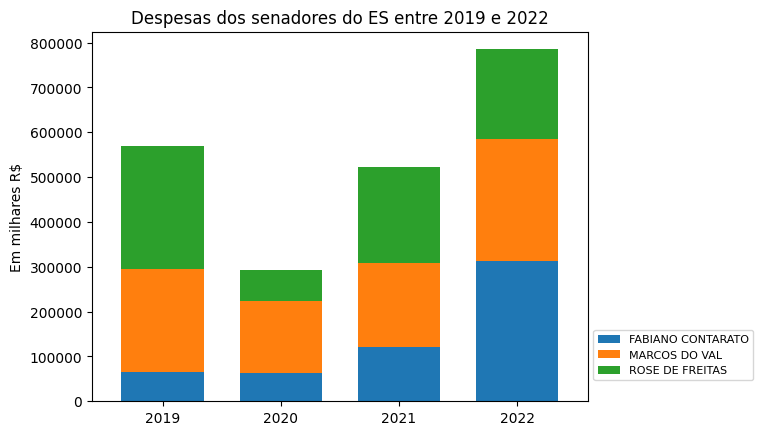

In [ ]:
# Separando os anos de pandemia e o ano anterior a ela em um novo DataFrame
df_ano_senadores_es = pd.DataFrame(index=(RemoveRepetidos(lista_ano))[0:4])
senadores_es = ["FABIANO CONTARATO", "MARCOS DO VAL", "ROSE DE FREITAS"] # Lista de senadores do estado do Espírito Santo no intervalo [2019,2022]

# DataFrame com os gastos dos senadores por ano
for senador in senadores_es:
  df_senador = df[df['SENADOR']==senador]
  lista_gasto_ano_senador_es = []
  for ano in RemoveRepetidos(lista_ano)[0:4]:
    df_senador_ano = df_senador[df_senador['ANO']==ano]
    gasto_senador_ano = df_senador_ano['VALOR_REEMBOLSADO'].sum()
    lista_gasto_ano_senador_es.append(gasto_senador_ano)
  df_ano_senadores_es[senador] = lista_gasto_ano_senador_es

# Gráfico de gastos totais e comparativo dos senadores do Espírito Santo
eixo = df_ano_senadores_es[::-1].plot(kind='bar', stacked=True, width=0.7,
        title="Despesas dos senadores do ES entre 2019 e 2022")
eixo.xaxis.set_major_locator(MultipleLocator(1))
plt.ylabel("Em milhares R$")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,0.125),
           loc='center left',
           fontsize=8)
plt.show()

# Lista com as médias dos senadores do ES por ano
gastos_es = df_ano_senadores_es.sum(axis=1).tolist()
lista_gastos_medios_es = []
for gasto in gastos_es:
  lista_gastos_medios_es.append(gasto/3)

# Média de gastos nacional e dos senadores do ES de 2019 à 2022
df_ano_senadores_es['MEDIA NACIONAL'] = lista_gasto_medio_ano[:4]
df_ano_senadores_es['MEDIA ES'] = lista_gastos_medios_es

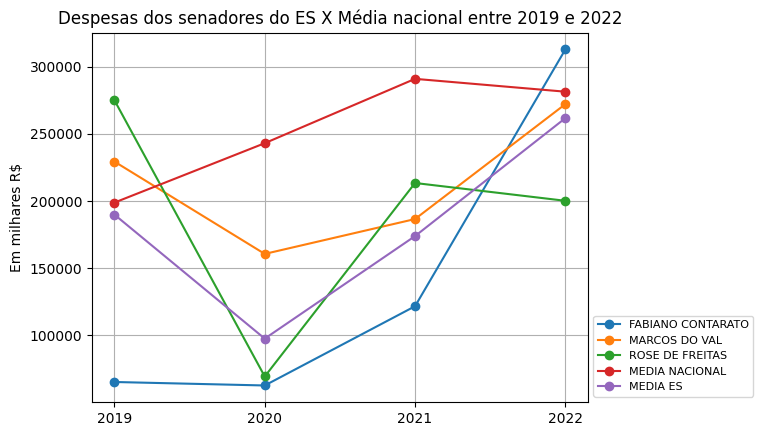

In [ ]:
# Gráfico comparativo entre os gastos dos senadores do Espírito Santo e o gasto médio nacional
eixo = df_ano_senadores_es.plot(marker='o',
                                title="Despesas dos senadores do ES X Média nacional entre 2019 e 2022")
eixo.xaxis.set_major_locator(MultipleLocator(1))
plt.legend(bbox_to_anchor=(1,0.125),
           loc='center left',
           fontsize=8)
plt.ylabel("Em milhares R$")
plt.grid()
plt.show()